<a href="https://colab.research.google.com/github/audwls4545/metaverse/blob/main/%EC%8B%A4%EC%8A%B506_%EB%8B%B9%EB%87%A8%EB%B3%91%EB%B0%9C%EB%B3%91%EC%97%AC%EB%B6%80%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning with PyTorch 
### 실습06. MPL Modeling : 당뇨병 발병 여부 분류 모델

1. Import & Exploer Data
2. Preprocess Data
3. Train Model
4. Test Model
  
<img src="https://dl.dropbox.com/s/j1mnyjbr3k5hwfp/diabet.png" width="400"/>


#### 1. Import & Exploer Data

In [3]:
# 1-1. Import Data

import pandas as pd

data = pd.read_csv('15강_데이터_Diabetes_Data.csv')
data.head()

,pregnant,gloucose,blood pressure,skin thickness,insulin,BMI,DPF,age,result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# 1-2. Data Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pregnant        768 non-null    int64  
 1   gloucose        768 non-null    int64  
 2   blood pressure  768 non-null    int64  
 3   skin thickness  768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   DPF             768 non-null    float64
 7   age             768 non-null    int64  
 8   result          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# 1-3. Data Describe

data.describe()

# 이상값이 나타나는 feature 전처리

,pregnant,gloucose,blood pressure,skin thickness,insulin,BMI,DPF,age,result
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### 2. Preprocss Data

In [6]:
# 2-1. x/y 

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [7]:
# 2-2. Split train/test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=9)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [8]:
# 2-3. Make Tensor
import torch

X_train=torch.FloatTensor(X_train.values)
X_test=torch.FloatTensor(X_test.values)
y_train=torch.FloatTensor(y_train.values)
y_test=torch.FloatTensor(y_test.values)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([614, 8])
torch.Size([154, 8])
torch.Size([614])
torch.Size([154])


In [12]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# 614/64 = 9.5xxx
print(len(train_loader))

10


In [13]:
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
# 154/64 = 2.xxx
print(len(test_loader))

3


#### 3. Train Model

In [15]:
# 3-1. Network

import torch
import torch.nn as nn
import torch.nn.functional as F

class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(8, 16)
        self.linear2 = nn.Linear(16, 32)
        self.linear3 = nn.Linear(32, 1)
        #self.linear4 = nn.Linear(64, 1)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        #self.dropout = nn.Dropout(p=0.2) 
        
    def forward(self, input):
        output = self.relu(self.linear1(input))
        output = self.relu(self.linear2(output))
        output = self.sigmoid(self.linear3(output))
        #output = self.dropout(output)
       # output = self.sigmoid(self.linear4(output))

        return output

model = model()

In [16]:
# 3-2. Loss Function & Optimizer

loss_function = nn.BCELoss() #2진이라서
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001) 

In [17]:
# 3-3. Train Loop

epochs = 5000
train_losses = []

for epoch in range(epochs):
  train_loss = 0
  for (data, label) in train_loader: # 64개씩 데이터 
        output = model.forward(data)
        loss = loss_function(output, label.view(-1,1)) 

        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()

        train_loss += loss.item()/len(train_loader)
  train_losses.append(train_loss)
  if epoch%100 == 0: 
    print("Epoch number : {} the loss : {}".format(epoch, train_loss))

Epoch number : 0 the loss : 2.1086914777755736
Epoch number : 100 the loss : 0.5222534030675887
Epoch number : 200 the loss : 0.48941039443016054
Epoch number : 300 the loss : 0.4359408020973205
Epoch number : 400 the loss : 0.4143892407417298
Epoch number : 500 the loss : 0.38543712794780727
Epoch number : 600 the loss : 0.3588353633880615
Epoch number : 700 the loss : 0.3460612654685974
Epoch number : 800 the loss : 0.32550312131643294
Epoch number : 900 the loss : 0.3185337230563164
Epoch number : 1000 the loss : 0.31994101107120515
Epoch number : 1100 the loss : 0.3156010195612907
Epoch number : 1200 the loss : 0.2991768836975097
Epoch number : 1300 the loss : 0.2934927374124527
Epoch number : 1400 the loss : 0.2888253957033158
Epoch number : 1500 the loss : 0.27486299872398373
Epoch number : 1600 the loss : 0.27359419763088233
Epoch number : 1700 the loss : 0.25932475030422214
Epoch number : 1800 the loss : 0.24934923201799397
Epoch number : 1900 the loss : 0.2538778379559517
Epoc

Text(0, 0.5, 'Loss')

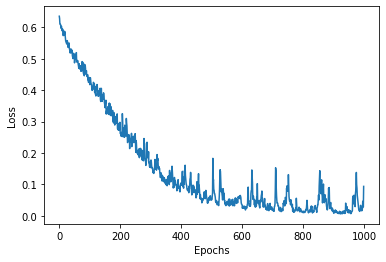

In [ ]:
# 3-4. Loss Graph

import matplotlib.pyplot as plt

plt.plot(range(epochs), train_losses)

plt.xlabel('Epochs')
plt.ylabel('Loss')

#### 4. Test Model

In [ ]:
# 4. Test & Evaluate

accuracy = 0
test_losses = 0

with torch.no_grad(): # gradient 계산 x
    for i, (data, label) in enumerate(test_loader):
        output = model(data)
        test_loss = loss_function(output, label.view(-1, 1)).item()
        test_losses += test_loss/len(test_loader)
        
        output[output >= 0.5] = 1
        output[output < 0.5] = 0
    
        accuracy = [1 if output[i] == label[i] else 0 for i in range(len(output))]
        accuracy = torch.IntTensor(accuracy)
        accuracy = torch.sum(accuracy) / len(output)

print(f'Test loss: {test_losses:.4f}, Test acc: {accuracy*100:.3f}%')

Test loss: 2.0165, Test acc: 65.385%
